Nama         : Ghozy Ghulamul Afif

NIM          : 1301170379

Judul TA     : Implementasi Information Gain (IG) dan Genetic Algorithm (GA) untuk Reduksi Dimensi pada Klasifikasi Data Microarray Menggunakan Functional Link Neural Network (FLNN)

Pembimbing 1 : Widi Astuti, S.T., M.Kom.

Pembimbing 2 : Prof. Dr. Adiwijaya

# 1. Preprocessing

## 1.1. Import Library

In [10]:
import pandas as pd
from sklearn.preprocessing import  MinMaxScaler
from pandas import DataFrame
from scipy.special import legendre
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import keras
from tensorflow.python.keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.python.keras import Sequential
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
import random
import timeit
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

## 1.2. Import Dataset

In [11]:
# data colon
url = "https://raw.githubusercontent.com/jamessaldo/final-task/master/colonTumor.data"
data_colon = pd.read_csv(url, header=None)

## 1.3. Check Missing Value

In [12]:
print('Total Missing Value pada Data colon Tumor:',data_colon.isnull().sum().sum())

Total Missing Value pada Data colon Tumor: 0


## 1.4. Normalization

In [13]:
# Melakukan normalisasi
# data colon
data_new_colon = data_colon.drop([2000],axis=1)
scaler = MinMaxScaler()
data_new_colon = scaler.fit_transform(data_new_colon)
data_new_colon = DataFrame(data_new_colon)
data_new_colon['label'] = list(data_colon[2000])
dic = {'negative':1,'positive':0}
data_new_colon.replace(dic,inplace=True)

# 2. Define Reusable Function

## FLNN Classifier

In [14]:
def FLNN_Classifier(data_train, data_test, orde, lr):
    start = timeit.default_timer()
    
    x_data_train = data_train.drop(['label'],axis=1)
    y_data_train = data_train['label']
    x_data_test = data_test.drop(['label'],axis=1)
    y_data_test = data_test['label']
    
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()

    for x in range(1, orde+1):
        pn = legendre(x)
        y_orde = pn(x_data_train)
        df_train = pd.concat([df_train, y_orde], axis=1)
        
        pn = legendre(x)
        y_orde = pn(x_data_test)
        df_test = pd.concat([df_test, y_orde], axis=1)

    df_train.columns = ["Attribut"+str(i) for i in range(len(df_train.columns))]
    df_train['label'] = y_data_train.reset_index().label
    X_train = df_train.iloc[:, 0:len(df_train.columns)-1].values
    y_train = df_train.iloc[:, len(df_train.columns)-1].values
    
    df_test.columns = ["Attribut"+str(i) for i in range(len(df_test.columns))]
    df_test['label'] = y_data_test.reset_index().label
    X_test = df_test.iloc[:, 0:len(df_test.columns)-1].values
    y_test = df_test.iloc[:, len(df_test.columns)-1].values

    # Melakukan proses klasifikasi FLNN
    # Inisialisasi FLNN
    Model = Sequential()
    # Menambah input layer dan hidden layer pertama
    Model.add(Dense(units = len(df_train.columns)-1, kernel_initializer = 'uniform', input_dim = len(df_train.columns)-1))
    # Menambah output layer
    Model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    # Menjalankan ANN
    Model.compile(optimizer = Adam(learning_rate=lr), loss = 'mean_squared_error', metrics = ['accuracy'])
    # Fitting ANN ke training set
    history = Model.fit(X_train, y_train, batch_size = 50, epochs = 100, validation_split = 0.2, verbose=False)

    #Memprediksi hasil test set
    y_pred = Model(X_test)
    y_pred =(y_pred >= 0.5)

    #print("X_Train :", X_train)
    print("Y_Train :", y_train)

    #print("X_Test :", X_test)
    print("Y_Test :", y_test)

    akurasi = accuracy_score(y_test,y_pred)
    F1 = f1_score(y_test, y_pred, average='macro')

    print("Akurasi : ", akurasi)
    print("F1_Score : ", F1)
    print(classification_report(y_test,y_pred))

    # Membuat confusion matrix
    from sklearn.metrics import confusion_matrix 
    from mlxtend.plotting import plot_confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plot_confusion_matrix(conf_mat = cm, figsize=(5,5))
    plt.show()

    stop = timeit.default_timer()
    print('Running Time: ', stop - start) 
    return akurasi, F1, stop-start

# 3. Classification

Train :  [ 1  2  4  5  6  7  8  9 10 11 13 14 16 17 18 19 23 25 26 27 29 30 31 32
 33 34 36 37 38 39 40 41 43 44 45 46 48 49 50 51 52 53 54 55 57 58 59 60
 61] Test :  [ 0  3 12 15 20 21 22 24 28 35 42 47 56]
colon + IG Orde 2 v1
Y_Train : [0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 0 0 1 1 0 0 1 1 1 0 1 0]
Y_Test : [1 0 1 0 1 0 1 1 1 1 0 0 1]
Akurasi :  0.6153846153846154
F1_Score :  0.606060606060606
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.71      0.62      0.67         8

    accuracy                           0.62        13
   macro avg       0.61      0.61      0.61        13
weighted avg       0.63      0.62      0.62        13



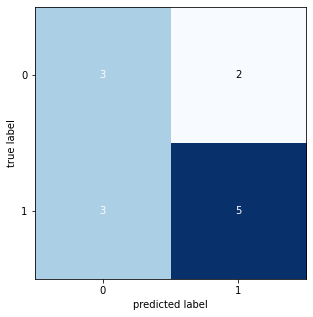

Running Time:  7.24290400000001
colon + IG Orde 3 v1
Y_Train : [0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 0 0 1 1 0 0 1 1 1 0 1 0]
Y_Test : [1 0 1 0 1 0 1 1 1 1 0 0 1]
Akurasi :  0.6153846153846154
F1_Score :  0.380952380952381
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.62      1.00      0.76         8

    accuracy                           0.62        13
   macro avg       0.31      0.50      0.38        13
weighted avg       0.38      0.62      0.47        13



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

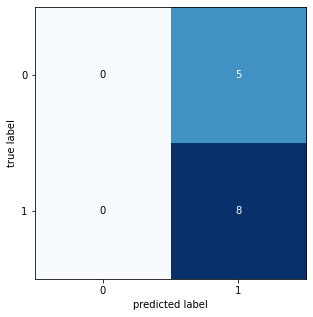

Running Time:  13.91218809999998
colon + IG Orde 4 v1
Y_Train : [0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 0 0 1 1 0 0 1 1 1 0 1 0]
Y_Test : [1 0 1 0 1 0 1 1 1 1 0 0 1]
Akurasi :  0.38461538461538464
F1_Score :  0.2777777777777778
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.00      0.00      0.00         8

    accuracy                           0.38        13
   macro avg       0.19      0.50      0.28        13
weighted avg       0.15      0.38      0.21        13



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

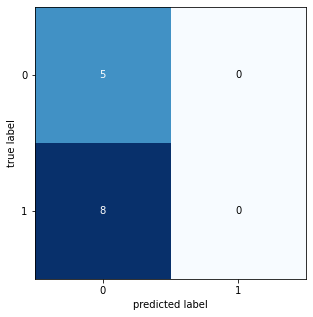

Running Time:  23.435815099999957
colon + IG Orde 2 v2
Y_Train : [0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 0 0 1 1 0 0 1 1 1 0 1 0]
Y_Test : [1 0 1 0 1 0 1 1 1 1 0 0 1]
Akurasi :  0.6153846153846154
F1_Score :  0.380952380952381
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.62      1.00      0.76         8

    accuracy                           0.62        13
   macro avg       0.31      0.50      0.38        13
weighted avg       0.38      0.62      0.47        13



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

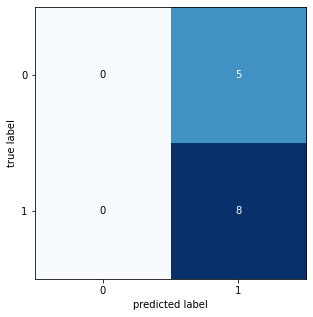

Running Time:  6.901230499999997
colon + IG Orde 3 v2
Y_Train : [0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 0 0 1 1 0 0 1 1 1 0 1 0]
Y_Test : [1 0 1 0 1 0 1 1 1 1 0 0 1]
Akurasi :  0.6153846153846154
F1_Score :  0.380952380952381
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.62      1.00      0.76         8

    accuracy                           0.62        13
   macro avg       0.31      0.50      0.38        13
weighted avg       0.38      0.62      0.47        13



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

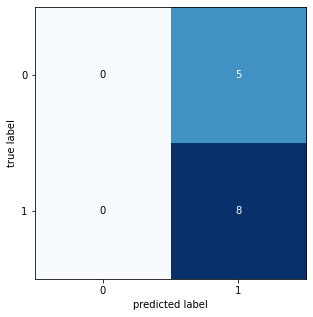

Running Time:  14.009369100000015
colon + IG Orde 4 v1
Y_Train : [0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 0 0 1 1 0 0 1 1 1 0 1 0]
Y_Test : [1 0 1 0 1 0 1 1 1 1 0 0 1]
Akurasi :  0.6153846153846154
F1_Score :  0.5751633986928105
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.67      0.75      0.71         8

    accuracy                           0.62        13
   macro avg       0.58      0.57      0.58        13
weighted avg       0.60      0.62      0.61        13



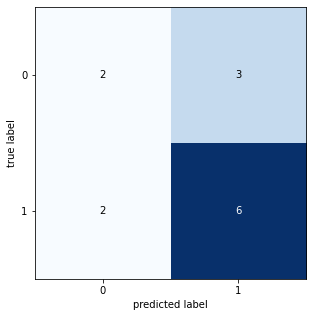

Running Time:  24.16798080000001
Train :  [ 0  1  2  3  4  5  6  7 11 12 13 14 15 16 17 19 20 21 22 24 25 26 27 28
 29 31 32 33 34 35 36 37 40 42 43 45 46 47 48 49 51 52 53 54 55 56 58 59
 61] Test :  [ 8  9 10 18 23 30 38 39 41 44 50 57 60]
colon + IG Orde 2 v1
Y_Train : [1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 0 1 1 1 0 0]
Y_Test : [1 0 1 1 0 1 0 1 0 1 0 1 1]
Akurasi :  0.38461538461538464
F1_Score :  0.2777777777777778
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.00      0.00      0.00         8

    accuracy                           0.38        13
   macro avg       0.19      0.50      0.28        13
weighted avg       0.15      0.38      0.21        13



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

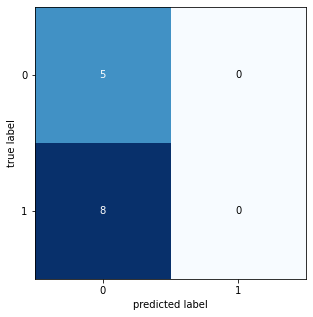

Running Time:  6.952554299999974
colon + IG Orde 3 v1
Y_Train : [1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 0 1 1 1 0 0]
Y_Test : [1 0 1 1 0 1 0 1 0 1 0 1 1]
Akurasi :  0.38461538461538464
F1_Score :  0.2777777777777778
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.00      0.00      0.00         8

    accuracy                           0.38        13
   macro avg       0.19      0.50      0.28        13
weighted avg       0.15      0.38      0.21        13



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

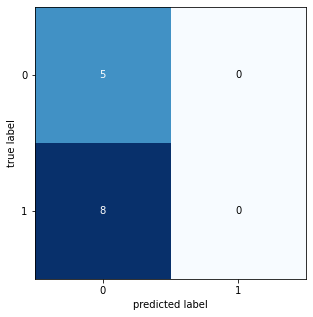

Running Time:  13.904972600000008
colon + IG Orde 4 v1
Y_Train : [1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 0 1 1 1 0 0]
Y_Test : [1 0 1 1 0 1 0 1 0 1 0 1 1]
Akurasi :  0.6153846153846154
F1_Score :  0.380952380952381
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.62      1.00      0.76         8

    accuracy                           0.62        13
   macro avg       0.31      0.50      0.38        13
weighted avg       0.38      0.62      0.47        13



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

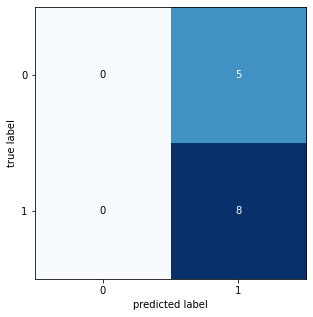

Running Time:  23.566814199999953
colon + IG Orde 2 v2
Y_Train : [1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 0 1 1 1 0 0]
Y_Test : [1 0 1 1 0 1 0 1 0 1 0 1 1]
Akurasi :  0.6153846153846154
F1_Score :  0.380952380952381
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.62      1.00      0.76         8

    accuracy                           0.62        13
   macro avg       0.31      0.50      0.38        13
weighted avg       0.38      0.62      0.47        13



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

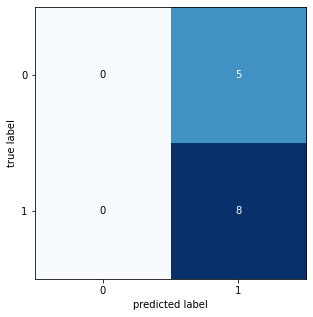

Running Time:  6.933947100000012
colon + IG Orde 3 v2
Y_Train : [1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 0 1 1 1 0 0]
Y_Test : [1 0 1 1 0 1 0 1 0 1 0 1 1]
Akurasi :  0.6153846153846154
F1_Score :  0.380952380952381
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.62      1.00      0.76         8

    accuracy                           0.62        13
   macro avg       0.31      0.50      0.38        13
weighted avg       0.38      0.62      0.47        13



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

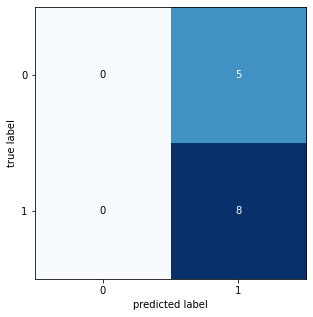

Running Time:  13.914761399999975
colon + IG Orde 4 v1
Y_Train : [1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 0 1 1 1 0 0]
Y_Test : [1 0 1 1 0 1 0 1 0 1 0 1 1]
Akurasi :  0.6153846153846154
F1_Score :  0.380952380952381
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.62      1.00      0.76         8

    accuracy                           0.62        13
   macro avg       0.31      0.50      0.38        13
weighted avg       0.38      0.62      0.47        13



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

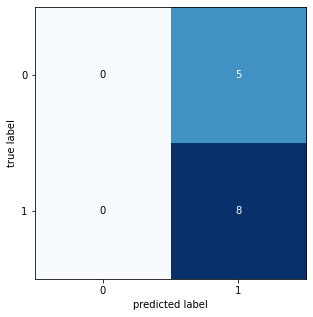

Running Time:  23.521489099999997
Train :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 27 28 30 31 35 37 38 39 40 41 42 43 44 45 47 48 49 50 51 52 55 56 57 58
 60 61] Test :  [19 25 26 29 32 33 34 36 46 53 54 59]
colon + IG Orde 2 v1
Y_Train : [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 0]
Y_Test : [0 1 1 1 1 1 1 1 1 0 0 0]
Akurasi :  0.3333333333333333
F1_Score :  0.25
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         4
           1       0.00      0.00      0.00         8

    accuracy                           0.33        12
   macro avg       0.17      0.50      0.25        12
weighted avg       0.11      0.33      0.17        12



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

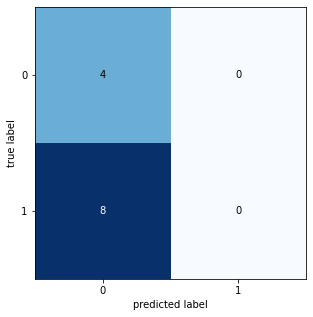

Running Time:  6.915152299999988
colon + IG Orde 3 v1
Y_Train : [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 0]
Y_Test : [0 1 1 1 1 1 1 1 1 0 0 0]
Akurasi :  0.6666666666666666
F1_Score :  0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

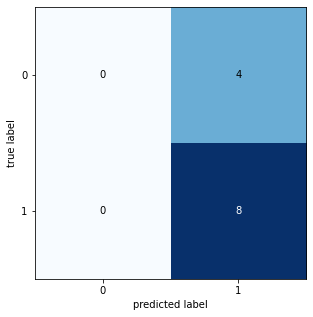

Running Time:  14.524468600000034
colon + IG Orde 4 v1
Y_Train : [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 0]
Y_Test : [0 1 1 1 1 1 1 1 1 0 0 0]
Akurasi :  0.6666666666666666
F1_Score :  0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

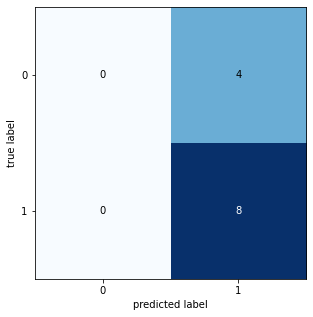

Running Time:  23.688549299999977
colon + IG Orde 2 v2
Y_Train : [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 0]
Y_Test : [0 1 1 1 1 1 1 1 1 0 0 0]
Akurasi :  0.6666666666666666
F1_Score :  0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

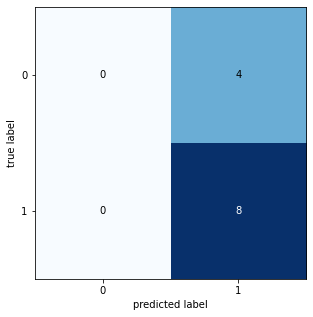

Running Time:  6.979162400000064
colon + IG Orde 3 v2
Y_Train : [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 0]
Y_Test : [0 1 1 1 1 1 1 1 1 0 0 0]
Akurasi :  0.6666666666666666
F1_Score :  0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

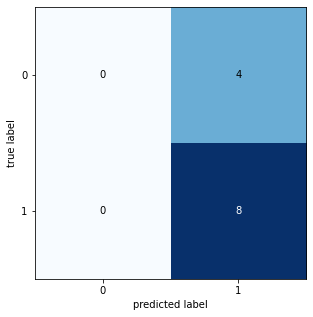

Running Time:  13.925902199999996
colon + IG Orde 4 v1
Y_Train : [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 0]
Y_Test : [0 1 1 1 1 1 1 1 1 0 0 0]
Akurasi :  0.3333333333333333
F1_Score :  0.25
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         4
           1       0.00      0.00      0.00         8

    accuracy                           0.33        12
   macro avg       0.17      0.50      0.25        12
weighted avg       0.11      0.33      0.17        12



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

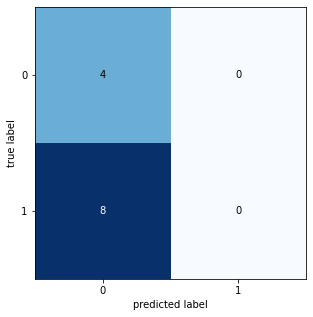

Running Time:  23.6013504
Train :  [ 0  1  3  4  5  8  9 10 12 15 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48 50 53 54 56 57 58 59
 60 61] Test :  [ 2  6  7 11 13 14 16 45 49 51 52 55]
colon + IG Orde 2 v1
Y_Train : [1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 0 1 0 0 0 1 1 1 0 1 0]
Y_Test : [1 1 0 0 0 1 1 1 0 1 1 1]
Akurasi :  0.3333333333333333
F1_Score :  0.25
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         4
           1       0.00      0.00      0.00         8

    accuracy                           0.33        12
   macro avg       0.17      0.50      0.25        12
weighted avg       0.11      0.33      0.17        12



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

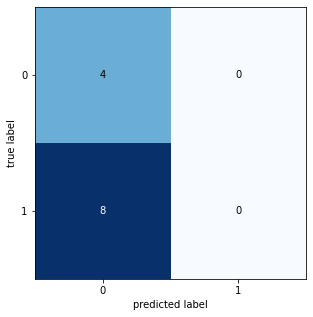

Running Time:  6.947692899999993
colon + IG Orde 3 v1
Y_Train : [1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 0 1 0 0 0 1 1 1 0 1 0]
Y_Test : [1 1 0 0 0 1 1 1 0 1 1 1]
Akurasi :  0.6666666666666666
F1_Score :  0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

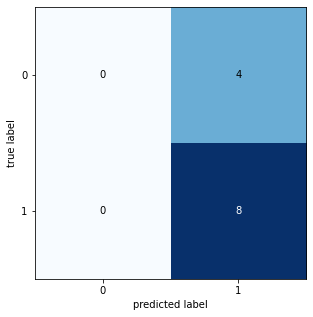

Running Time:  13.841461900000013
colon + IG Orde 4 v1
Y_Train : [1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 0 1 0 0 0 1 1 1 0 1 0]
Y_Test : [1 1 0 0 0 1 1 1 0 1 1 1]
Akurasi :  0.6666666666666666
F1_Score :  0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

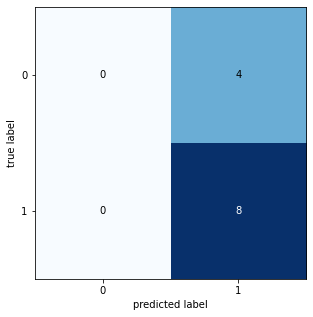

Running Time:  23.386705000000006
colon + IG Orde 2 v2
Y_Train : [1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 0 1 0 0 0 1 1 1 0 1 0]
Y_Test : [1 1 0 0 0 1 1 1 0 1 1 1]
Akurasi :  0.6666666666666666
F1_Score :  0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

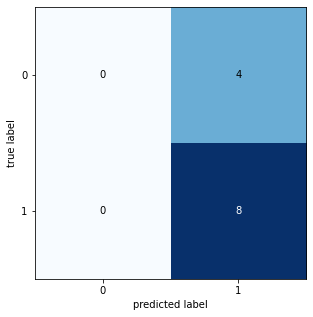

Running Time:  7.492558799999983
colon + IG Orde 3 v2
Y_Train : [1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 0 1 0 0 0 1 1 1 0 1 0]
Y_Test : [1 1 0 0 0 1 1 1 0 1 1 1]
Akurasi :  0.5
F1_Score :  0.48571428571428577
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         4
           1       1.00      0.25      0.40         8

    accuracy                           0.50        12
   macro avg       0.70      0.62      0.49        12
weighted avg       0.80      0.50      0.46        12



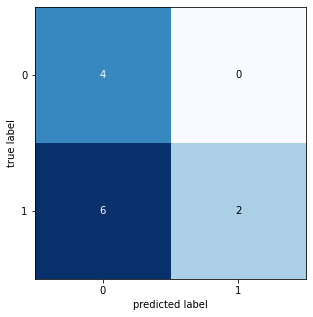

Running Time:  13.851409200000035
colon + IG Orde 4 v1
Y_Train : [1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 0 1 0 0 0 1 1 1 0 1 0]
Y_Test : [1 1 0 0 0 1 1 1 0 1 1 1]
Akurasi :  0.6666666666666666
F1_Score :  0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

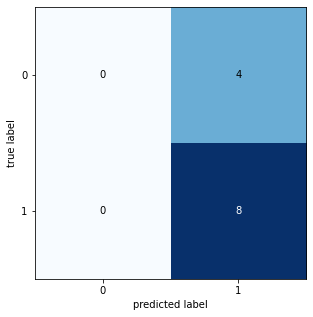

Running Time:  23.90403779999997
Train :  [ 0  2  3  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26 28
 29 30 32 33 34 35 36 38 39 41 42 44 45 46 47 49 50 51 52 53 54 55 56 57
 59 60] Test :  [ 1  4  5 17 27 31 37 40 43 48 58 61]
colon + IG Orde 2 v1
Y_Train : [1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 0 0 0 1 1 0 0 1 1 1 0 1]
Y_Test : [0 1 0 0 1 1 1 1 1 1 1 0]
Akurasi :  0.6666666666666666
F1_Score :  0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

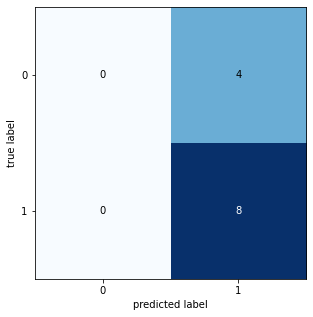

Running Time:  6.988391400000069
colon + IG Orde 3 v1
Y_Train : [1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 0 0 0 1 1 0 0 1 1 1 0 1]
Y_Test : [0 1 0 0 1 1 1 1 1 1 1 0]
Akurasi :  0.6666666666666666
F1_Score :  0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

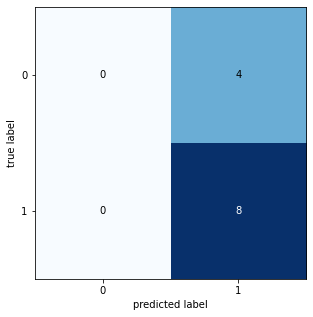

Running Time:  13.873800599999981
colon + IG Orde 4 v1
Y_Train : [1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 0 0 0 1 1 0 0 1 1 1 0 1]
Y_Test : [0 1 0 0 1 1 1 1 1 1 1 0]
Akurasi :  0.5833333333333334
F1_Score :  0.3684210526315789
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.64      0.88      0.74         8

    accuracy                           0.58        12
   macro avg       0.32      0.44      0.37        12
weighted avg       0.42      0.58      0.49        12



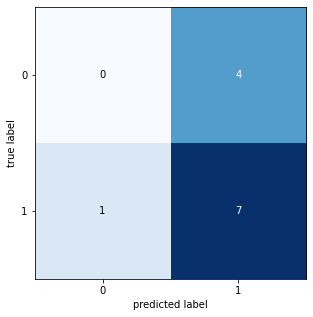

Running Time:  23.313102200000003
colon + IG Orde 2 v2
Y_Train : [1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 0 0 0 1 1 0 0 1 1 1 0 1]
Y_Test : [0 1 0 0 1 1 1 1 1 1 1 0]
Akurasi :  0.6666666666666666
F1_Score :  0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

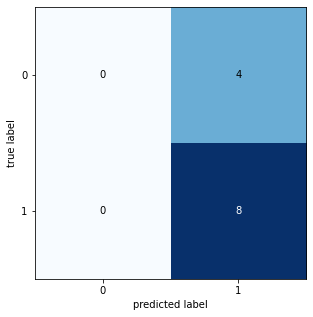

Running Time:  6.881327599999963
colon + IG Orde 3 v2
Y_Train : [1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 0 0 0 1 1 0 0 1 1 1 0 1]
Y_Test : [0 1 0 0 1 1 1 1 1 1 1 0]
Akurasi :  0.6666666666666666
F1_Score :  0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Undefin

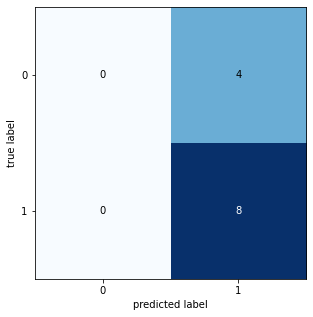

Running Time:  13.863236400000005
colon + IG Orde 4 v1
Y_Train : [1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 0 0 0 1 1 0 0 1 1 1 0 1]
Y_Test : [0 1 0 0 1 1 1 1 1 1 1 0]
Akurasi :  0.4166666666666667
F1_Score :  0.37777777777777777
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         4
           1       1.00      0.12      0.22         8

    accuracy                           0.42        12
   macro avg       0.68      0.56      0.38        12
weighted avg       0.79      0.42      0.33        12



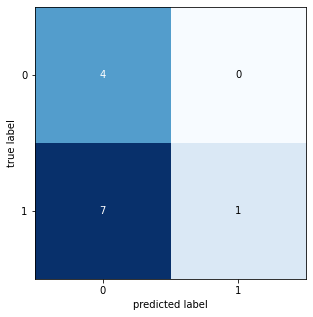

Running Time:  24.276252799999952
Avg accuracy colon cancer + IG orde 2 v1 :  0.4666666666666666
Avg F1 score colon cancer + IG orde 2 v1 :  0.35676767676767673
Avg running time colon cancer + IG orde 2 v1 :  7.009338980000007
Avg accuracy colon cancer + IG orde 3 v1 :  0.5999999999999999
Avg F1 score colon cancer + IG orde 3 v1 :  0.37174603174603177
Avg running time colon cancer + IG orde 3 v1 :  14.011378360000004
Avg accuracy colon cancer + IG orde 4 v1 :  0.5833333333333333
Avg F1 score colon cancer + IG orde 4 v1 :  0.36543024227234755
Avg running time colon cancer + IG orde 4 v1 :  23.47819715999998
Avg accuracy colon cancer + IG orde 2 v2 :  0.6461538461538461
Avg F1 score colon cancer + IG orde 2 v2 :  0.3923809523809524
Avg running time colon cancer + IG orde 2 v2 :  7.037645280000004
Avg accuracy colon cancer + IG orde 3 v2 :  0.6128205128205128
Avg F1 score colon cancer + IG orde 3 v2 :  0.40952380952380957
Avg running time colon cancer + IG orde 3 v2 :  13.912935660000006


In [15]:
start = timeit.default_timer()
akurasi_IG_2_v1,f1_IG_2_v1,rt_IG_2_v1 = [],[],[]
akurasi_IG_3_v1,f1_IG_3_v1,rt_IG_3_v1 = [],[],[]
akurasi_IG_4_v1,f1_IG_4_v1,rt_IG_4_v1 = [],[],[]

akurasi_IG_2_v2,f1_IG_2_v2,rt_IG_2_v2 = [],[],[]
akurasi_IG_3_v2,f1_IG_3_v2,rt_IG_3_v2 = [],[],[]
akurasi_IG_4_v2,f1_IG_4_v2,rt_IG_4_v2 = [],[],[]

#Melakukan proses K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
kf.get_n_splits(data_new_colon)
X = data_new_colon.copy().iloc[:, 0:len(data_new_colon.columns)-1].values
Y = data_new_colon.copy().iloc[:, len(data_new_colon.columns)-1].values
for train_index, test_index in kf.split(X,Y):
    print("Train : ", train_index, "Test : ", test_index)
    data_train, data_test, y_train, y_test = pd.DataFrame(X[train_index]), pd.DataFrame(X[test_index]), Y[train_index], Y[test_index]
    data_train['label'] = y_train
    data_test['label'] = y_test
    
    print("colon + IG Orde 2 v1")
    acc,f1,rt = FLNN_Classifier(data_train.copy(), data_test.copy(), 2, 0.6)
    akurasi_IG_2_v1.append(acc)
    f1_IG_2_v1.append(f1)
    rt_IG_2_v1.append(rt)
    print("colon + IG Orde 3 v1")
    acc,f1,rt = FLNN_Classifier(data_train.copy(), data_test.copy(), 3, 0.6)
    akurasi_IG_3_v1.append(acc)
    f1_IG_3_v1.append(f1)
    rt_IG_3_v1.append(rt)
    print("colon + IG Orde 4 v1")
    acc,f1,rt = FLNN_Classifier(data_train.copy(), data_test.copy(), 4, 0.6)
    akurasi_IG_4_v1.append(acc)
    f1_IG_4_v1.append(f1)
    rt_IG_4_v1.append(rt)
    
    print("colon + IG Orde 2 v2")
    acc,f1,rt = FLNN_Classifier(data_train.copy(), data_test.copy(), 2, 0.001)
    akurasi_IG_2_v2.append(acc)
    f1_IG_2_v2.append(f1)
    rt_IG_2_v2.append(rt)
    print("colon + IG Orde 3 v2")
    acc,f1,rt = FLNN_Classifier(data_train.copy(), data_test.copy(), 3, 0.001)
    akurasi_IG_3_v2.append(acc)
    f1_IG_3_v2.append(f1)
    rt_IG_3_v2.append(rt)
    print("colon + IG Orde 4 v1")
    acc,f1,rt = FLNN_Classifier(data_train.copy(), data_test.copy(), 4, 0.001)
    akurasi_IG_4_v2.append(acc)
    f1_IG_4_v2.append(f1)
    rt_IG_4_v2.append(rt)
    
akurasi_IG_2_v1,f1_IG_2_v1,rt_IG_2_v1 = np.array(akurasi_IG_2_v1),np.array(f1_IG_2_v1),np.array(rt_IG_2_v1)
akurasi_IG_3_v1,f1_IG_3_v1,rt_IG_3_v1 = np.array(akurasi_IG_3_v1),np.array(f1_IG_3_v1),np.array(rt_IG_3_v1)
akurasi_IG_4_v1,f1_IG_4_v1,rt_IG_4_v1 = np.array(akurasi_IG_4_v1),np.array(f1_IG_4_v1),np.array(rt_IG_4_v1)

akurasi_IG_2_v2,f1_IG_2_v2,rt_IG_2_v2 = np.array(akurasi_IG_2_v2),np.array(f1_IG_2_v2),np.array(rt_IG_2_v2)
akurasi_IG_3_v2,f1_IG_3_v2,rt_IG_3_v2 = np.array(akurasi_IG_3_v2),np.array(f1_IG_3_v2),np.array(rt_IG_3_v2)
akurasi_IG_4_v2,f1_IG_4_v2,rt_IG_4_v2 = np.array(akurasi_IG_4_v2),np.array(f1_IG_4_v2),np.array(rt_IG_4_v2)


#Print Result
print('===============================================================================================================================================================================================================')
print('Avg accuracy colon cancer + IG orde 2 v1 : ', akurasi_IG_2_v1.mean())
print('Avg F1 score colon cancer + IG orde 2 v1 : ', f1_IG_2_v1.mean())
print('Avg running time colon cancer + IG orde 2 v1 : ', rt_IG_2_v1.mean())
print('Avg accuracy colon cancer + IG orde 3 v1 : ', akurasi_IG_3_v1.mean())
print('Avg F1 score colon cancer + IG orde 3 v1 : ', f1_IG_3_v1.mean())
print('Avg running time colon cancer + IG orde 3 v1 : ', rt_IG_3_v1.mean())
print('Avg accuracy colon cancer + IG orde 4 v1 : ', akurasi_IG_4_v1.mean())
print('Avg F1 score colon cancer + IG orde 4 v1 : ', f1_IG_4_v1.mean())
print('Avg running time colon cancer + IG orde 4 v1 : ', rt_IG_4_v1.mean())
print('===============================================================================================================================================================================================================')
print('Avg accuracy colon cancer + IG orde 2 v2 : ', akurasi_IG_2_v2.mean())
print('Avg F1 score colon cancer + IG orde 2 v2 : ', f1_IG_2_v2.mean())
print('Avg running time colon cancer + IG orde 2 v2 : ', rt_IG_2_v2.mean())
print('Avg accuracy colon cancer + IG orde 3 v2 : ', akurasi_IG_3_v2.mean())
print('Avg F1 score colon cancer + IG orde 3 v2 : ', f1_IG_3_v2.mean())
print('Avg running time colon cancer + IG orde 3 v2 : ', rt_IG_3_v2.mean())
print('Avg accuracy colon cancer + IG orde 4 v2 : ', akurasi_IG_4_v2.mean())
print('Avg F1 score colon cancer + IG orde 4 v2 : ', f1_IG_4_v2.mean())
print('Avg running time colon cancer + IG orde 4 v2 : ', rt_IG_4_v2.mean())
print()
stop = timeit.default_timer()
print("Overall Running Time : ", stop-start)